## 0. Install and Import Dependencies

In [25]:
#!pip install easyocr
#!pip install imutils

In [26]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

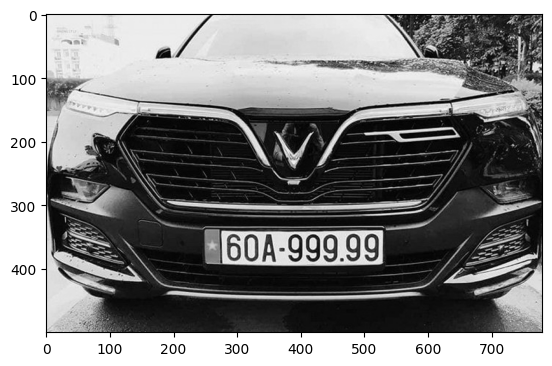

In [27]:
img = cv2.imread('image5.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

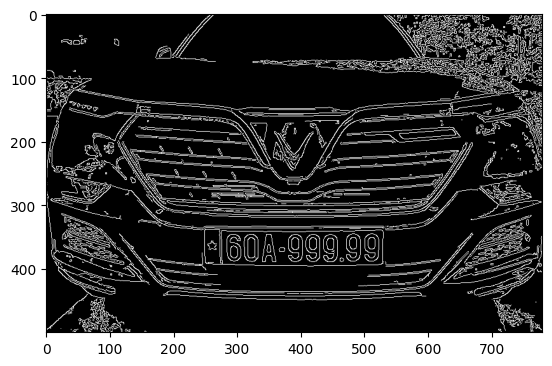

In [28]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [29]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [30]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [31]:
location

array([[[530, 342]],

       [[522, 394]],

       [[277, 392]],

       [[277, 340]]], dtype=int32)

In [32]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

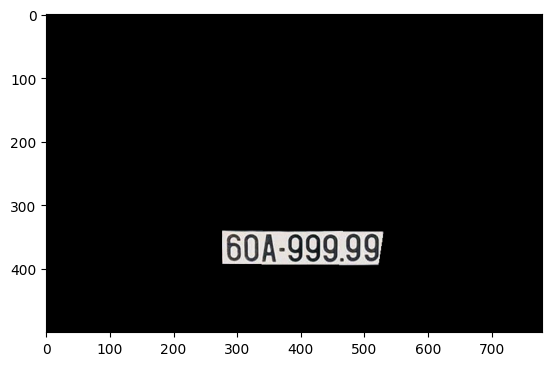

In [33]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [34]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
cropped_image

array([[105, 108, 108, ..., 189, 129,  26],
       [215, 213, 216, ..., 240, 173,  48],
       [255, 227, 230, ..., 230, 178,  73],
       ...,
       [151, 201, 197, ..., 124,  39,  15],
       [101,  98, 104, ...,  29,  20,  29],
       [  9,   9,  15, ...,  11,  16,  32]], dtype=uint8)

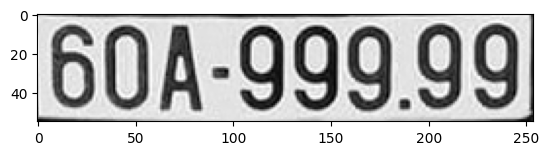

In [35]:
license_plate_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [36]:
# Chuyển đổi biển số thành ảnh grayscale và nhị phân
gray_plate = cv2.cvtColor(license_plate_image, cv2.COLOR_BGR2GRAY);
_, binary_plate = cv2.threshold(gray_plate, 128, 255, cv2.THRESH_BINARY_INV);

# Tìm các contour của các ký tự
contours, _ = cv2.findContours(binary_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE);

characters = [];
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour);
    
    # Cắt từng ký tự
    char_image = binary_plate[y:y + h, x:x + w];
    characters.append(char_image);

for idx, char_image in enumerate(characters):
        char_path = f"{'./char_library'}/char_{idx}.png"
        cv2.imwrite(char_path, char_image)
